<a href="https://colab.research.google.com/github/shalakagangadhare/Market-research-analysis/blob/main/Scaping_%26_Data_analyst_(amazon).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**🔍 Objective**



The goal of this project is to extract product information from Amazon's search results pages across multiple categories (e.g., toys, furniture, books, and headphones) to analyze pricing patterns, product availability, and category-wise trends.

**📈 Workflow**

Define search URLs for each category

Use requests (or BeautifulSoup) to load and parse the HTML

Extract relevant product data

Save the data to a CSV or DataFrame

Visualize insights – e.g., price distribution by category

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests

In [ ]:
URL = {"https://www.amazon.in/s?k=toys&crid=2SMAV8UZVGP29&sprefix=%2Caps%2C548&ref=nb_sb_ss_recent_5_0_recent":'toys',
"https://www.amazon.in/s?k=furniture&crid=3F5038HZUUMJ1&sprefix=furniture%2Caps%2C363&ref=nb_sb_noss_2":'furniture',
       "https://www.amazon.in/s?k=books&ref=nb_sb_noss":'Books',
      " https://www.amazon.in/s?k=headphones&crid=TGHLS1M4SJLL&sprefix=headphones%2Caps%2C396&ref=nb_sb_noss_2":'headphones'}

In [ ]:
HEADERS = {'user_agent':"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/135.0.0.0 Safari/537.36","Accept-Language":"en-US,en;q=0.5"}

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests

URL = {"https://www.amazon.in/s?k=toys&crid=2SMAV8UZVGP29&sprefix=%2Caps%2C548&ref=nb_sb_ss_recent_5_0_recent":'toys',
"https://www.amazon.in/s?k=furniture&crid=3F5038HZUUMJ1&sprefix=furniture%2Caps%2C363&ref=nb_sb_noss_2":'furniture',
       "https://www.amazon.in/s?k=books&ref=nb_sb_noss":'Books',
      " https://www.amazon.in/s?k=headphones&crid=TGHLS1M4SJLL&sprefix=headphones%2Caps%2C396&ref=nb_sb_noss_2":'headphones'}

HEADERS = {'user_agent':"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/135.0.0.0 Safari/537.36","Accept-Language":"en-US,en;q=0.5"}

# Iterate through the URL dictionary
for url, product_type in URL.items():
    # Make a request for each URL
    print(f"Fetching data for {product_type} from {url}")  # Print the URL being processed
    webpage = requests.get(url, headers=HEADERS)

    # Process the webpage content here
    # ... (Your code to handle the response for each URL) ...
    print(webpage.content)

Fetching data for toys from https://www.amazon.in/s?k=toys&crid=2SMAV8UZVGP29&sprefix=%2Caps%2C548&ref=nb_sb_ss_recent_5_0_recent
b'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n<!-- sp:feature:csm:head-open-part1 -->\n\n<!-- sp:end-feature:csm:head-open-part1 -->\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n<!-- sp:end-feature:cs-optimization -->\n<!-- sp:feature:csm:head-open-part2 -->\n\n<!-- sp:end-feature:csm:head-open-part2 -->\n<!-- sp:feature:aui-assets -->\n<link rel="stylesheet" href="https://m.media-amazon.com/images/I/11EIQ5IGqaL._RC|01ZTHTZObnL.

In [ ]:
webpage.content

b'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n<!-- sp:feature:csm:head-open-part1 -->\n\n<!-- sp:end-feature:csm:head-open-part1 -->\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n<!-- sp:end-feature:cs-optimization -->\n<!-- sp:feature:csm:head-open-part2 -->\n\n<!-- sp:end-feature:csm:head-open-part2 -->\n<!-- sp:feature:aui-assets -->\n<link rel="stylesheet" href="https://m.media-amazon.com/images/I/11EIQ5IGqaL._RC|01ZTHTZObnL.css,51rW56+edML.css,31dM35l3U7L.css,11D3BPoiHRL.css,01qDClimA1L.css,01s-u+zGGeL.css,413Vvv3GONL.css,11TIuySqr6L.css,01Rw4F+QU6L.cs

In [ ]:
#Soup Objects containing all data
soup= BeautifulSoup(webpage.content,"html.parser") # BeautifulSoup needs to be called with a capital B and S.

In [ ]:
#fetch links as list of tag objects
links =soup.find_all("a") # Assuming you want to find all anchor tags

In [ ]:
links

[<a id="nav-top"></a>,
 <a aria-label="main content" class="nav-assistant-link nav-assistant-menu-item nav-assistant-link-item a-color-base a-color-link" data-behavior="navigate" data-nav-assist-menu-item-index="0" data-target="#skippedLink" href="#skippedLink" id="nav-assist-skip-to-main-content" tabindex="0">
         Main content
         </a>,
 <a aria-label="Results" class="nav-assistant-link nav-assistant-menu-item nav-assistant-link-item a-color-base a-color-link" data-behavior="navigate" data-nav-assist-menu-item-index="1" data-selector-prereq=".s-asin" data-target=".s-asin a:has(h2)" href=".s-asin a:has(h2)" id="nav-assist-skip-to-results" tabindex="-1">
         Results
         </a>,
 <a aria-label="Filters" class="nav-assistant-link nav-assistant-menu-item nav-assistant-link-item a-color-base a-color-link" data-behavior="navigate" data-nav-assist-menu-item-index="2" data-selector-exclude="#s-all-filters-announce" data-selector-prereq="#s-refinements &gt; div.a-section &gt; 

In [ ]:
from bs4 import BeautifulSoup
import requests

# Target URL (can be any webpage)
url = {"https://www.amazon.in/s?k=toys&crid=2SMAV8UZVGP29&sprefix=%2Caps%2C548&ref=nb_sb_ss_recent_5_0_recent":'toys',
"https://www.amazon.in/s?k=furniture&crid=3F5038HZUUMJ1&sprefix=furniture%2Caps%2C363&ref=nb_sb_noss_2":'furniture',
       "https://www.amazon.in/s?k=books&ref=nb_sb_noss":'Books',
      " https://www.amazon.in/s?k=headphones&crid=TGHLS1M4SJLL&sprefix=headphones%2Caps%2C396&ref=nb_sb_noss_2":'headphones'}

# Amazon requires headers to simulate a real browser
headers = {
    "User-Agent": "Mozilla/5.0",
    "Accept-Language": "en-US,en;q=0.9"
}

# Iterate through the URL dictionary
for url_link, product_type in url.items():
    # Fetch the page for each URL
    print(f"Fetching data for {product_type} from {url_link}")
    response = requests.get(url_link, headers=headers) # Pass the current URL using url_link
    soup = BeautifulSoup(response.content, "html.parser")

    # Extract all anchor tags with href attribute
    all_links = []

    for a_tag in soup.find_all("a", href=True):
        href = a_tag["href"]

        # Normalize relative URLs
        if href.startswith("/"):
            href = "https://www.amazon.com" + href
        all_links.append(href)

    # Display results for the current URL
    print(f"Links for {product_type}:")
    for link in all_links:
        print(link)

Fetching data for toys from https://www.amazon.in/s?k=toys&crid=2SMAV8UZVGP29&sprefix=%2Caps%2C548&ref=nb_sb_ss_recent_5_0_recent
Links for toys:
#skippedLink
.s-asin a:has(h2)
#s-skipLinkTargetForFilterOptions
https://www.amazon.com/ref=nav_logo

https://www.amazon.com/customer-preferences/edit?ie=UTF8&preferencesReturnUrl=%2F&ref_=topnav_lang
https://www.amazon.in/ap/signin?openid.pape.max_auth_age=0&openid.return_to=https%3A%2F%2Fwww.amazon.in%2Fs%2F%3F_encoding%3DUTF8%26crid%3D2SMAV8UZVGP29%26k%3Dtoys%26ref%3Dnb_sb_ss_recent_5_0_recent%26sprefix%3D%252Caps%252C548%26ref_%3Dnav_ya_signin&openid.identity=http%3A%2F%2Fspecs.openid.net%2Fauth%2F2.0%2Fidentifier_select&openid.assoc_handle=inflex&openid.mode=checkid_setup&openid.claimed_id=http%3A%2F%2Fspecs.openid.net%2Fauth%2F2.0%2Fidentifier_select&openid.ns=http%3A%2F%2Fspecs.openid.net%2Fauth%2F2.0
https://www.amazon.com/gp/css/order-history?ref_=nav_orders_first
https://www.amazon.com/gp/cart/view.html?ref_=nav_cart
https://www.ama

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import requests
from bs4 import BeautifulSoup
import pandas as pd

# List of Amazon URLs (you can add more)
urls = {
    "https://www.amazon.in/s?k=toys&crid=2SMAV8UZVGP29&sprefix=%2Caps%2C548&ref=nb_sb_ss_recent_5_0_recent":'toys',
    "https://www.amazon.in/s?k=furniture&crid=3F5038HZUUMJ1&sprefix=furniture%2Caps%2C363&ref=nb_sb_noss_2":'furniture',
    "https://www.amazon.in/s?k=books&ref=nb_sb_noss":'Books',
    "https://www.amazon.in/s?k=headphones&crid=TGHLS1M4SJLL&sprefix=headphones%2Caps%2C396&ref=nb_sb_noss_2":'headphones' # This line was likely misaligned
}

    # Add more URLs here...


# Headers to mimic browser
headers = {
    "User-Agent": "Mozilla/5.0",
    "Accept-Language": "en-US,en;q=0.9"
}

# List to collect data
data = []

# Loop through URLs
for url, category in urls.items():
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")
    items = soup.select("div.s-main-slot div.s-result-item[data-asin]")

    for item in items:
        title_tag = item.select_one("h2 span")
        price_tag = item.select_one("span.a-price > span.a-offscreen")

        title = title_tag.get_text(strip=True) if title_tag else "Title not found"
        price = price_tag.get_text(strip=True) if price_tag else "Price not found"

        data.append({"Title": title, "Price": price})

# Convert to DataFrame
df = pd.DataFrame(data)

# Show the DataFrame
print(df)

# Optional: Save to CSV
df.to_csv("amazon_products.csv", index=False)

                                                 Title            Price
0                                      Title not found  Price not found
1                                      Title not found  Price not found
2                                   Toy Story (4K UHD)             ₹119
3                                          Toy Story 4             ₹119
4                                          Toy Story 2             ₹119
..                                                 ...              ...
149  boAt Bassheads 900 Pro Wired Headphones with 4...             ₹999
150  Sony WH-CH520 Wireless Bluetooth Headphones wi...           ₹3,989
151                                    Title not found  Price not found
152                                    Title not found  Price not found
153                                    Title not found  Price not found

[154 rows x 2 columns]


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import requests
from bs4 import BeautifulSoup
import pandas as pd

# List of Amazon URLs (you can add more)
urls = {
    "https://www.amazon.in/s?k=toys&crid=2SMAV8UZVGP29&sprefix=%2Caps%2C548&ref=nb_sb_ss_recent_5_0_recent":'toys',
    "https://www.amazon.in/s?k=furniture&crid=3F5038HZUUMJ1&sprefix=furniture%2Caps%2C363&ref=nb_sb_noss_2":'furniture',
    "https://www.amazon.in/s?k=books&ref=nb_sb_noss":'Books',
    "https://www.amazon.in/s?k=headphones&crid=TGHLS1M4SJLL&sprefix=headphones%2Caps%2C396&ref=nb_sb_noss_2":'headphones' # This line was likely misaligned
}

    # Add more URLs here...


# Headers to mimic browser
headers = {
    "User-Agent": "Mozilla/5.0",
    "Accept-Language": "en-US,en;q=0.9"
}

# List to collect data
data = []

# Loop through URLs
for url, category in urls.items():
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")
    items = soup.select("div.s-main-slot div.s-result-item[data-asin]")

    for item in items:
        title_tag = item.select_one("h2 span")
        price_tag = item.select_one("span.a-price > span.a-offscreen")

        title = title_tag.get_text(strip=True) if title_tag else "Title not found"
        price = price_tag.get_text(strip=True) if price_tag else "Price not found"

        #Adding the category to the dictionary here, as suggested by the notebook author in the comments
        data.append({"Title": title, "Price": price, "Category": category})

# Convert to DataFrame
df = pd.DataFrame(data)

# Show the DataFrame
print(df)

# Optional: Save to CSV
df.to_csv("amazon_products.csv", index=False)

                                                 Title            Price  \
0                                      Title not found  Price not found   
1                                      Title not found  Price not found   
2    Storio Rechargeable Toys Talking Cactus Baby T...             ₹338   
3    Graphene Airplane Launcher Gun, Safe and Fun S...             ₹299   
4    Gooyo DB2060 Rechargeable 360° Rotating & Roll...             ₹389   
..                                                 ...              ...   
149  boAt Rockerz 550 Bluetooth Wireless Over Ear H...           ₹1,799   
150  JBL C100SI Wired In Ear Headphones with Mic, J...             ₹599   
151                                    Title not found  Price not found   
152                                    Title not found  Price not found   
153                                    Title not found  Price not found   

       Category  
0          toys  
1          toys  
2          toys  
3          toys  
4        

<ipython-input-29-7076e202dca6>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x="Price_clean", y="Title", palette="viridis")
<ipython-input-29-7076e202dca6>:21: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


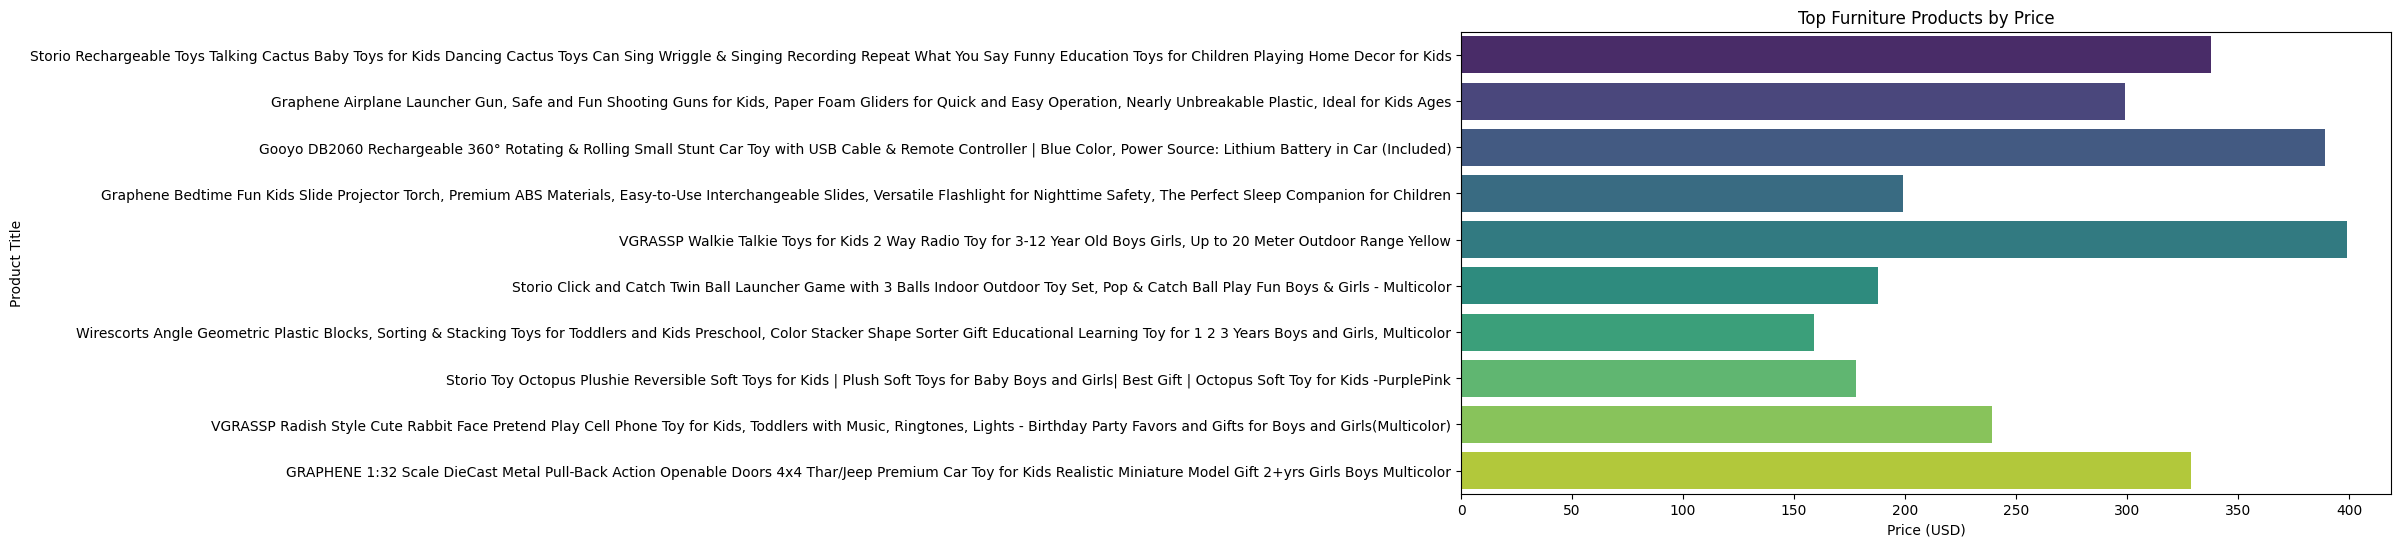

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean the Price column: remove $ and convert to float
df["Price_clean"] = df["Price"].str.replace(r"[^0-9.]", "", regex=True)
df["Price_clean"] = pd.to_numeric(df["Price_clean"], errors="coerce")

# Drop rows where price could not be parsed
df = df.dropna(subset=["Price_clean"])

# Limit to top N items for clearer plot (optional)
top_n = 10
df_plot = df.head(top_n)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, x="Price_clean", y="Title", palette="viridis")
plt.title("Top Furniture Products by Price")
plt.xlabel("Price (USD)")
plt.ylabel("Product Title")
plt.tight_layout()
plt.show()

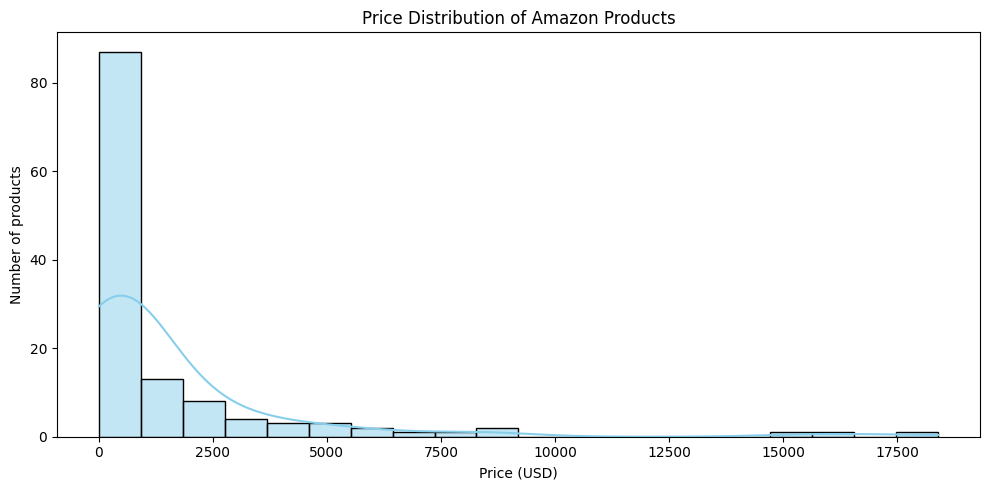

In [ ]:
#Histogram — Price Distribution
#Shows how many products fall into different price ranges.
plt.figure(figsize=(10, 5))
sns.histplot(df["Price_clean"], bins=20, kde=True, color='skyblue')
plt.title("Price Distribution of Amazon Products")
plt.xlabel("Price (USD)")
plt.ylabel("Number of products")
plt.tight_layout()
plt.show()

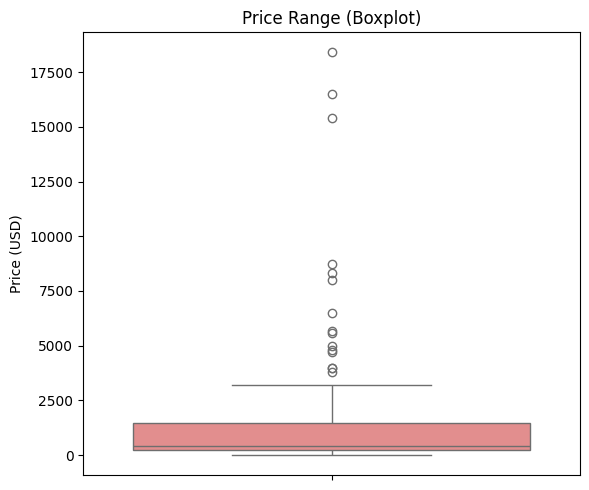

In [ ]:
#. Boxplot — Price Range #great for spotting outliers and price spread.
plt.figure(figsize=(6, 5))
sns.boxplot(y=df["Price_clean"], color='lightcoral')
plt.title("Price Range (Boxplot)")
plt.ylabel("Price (USD)")
plt.tight_layout()
plt.show()

<ipython-input-35-e7ab39278683>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_counts, x='Category', y='Count', palette='pastel')


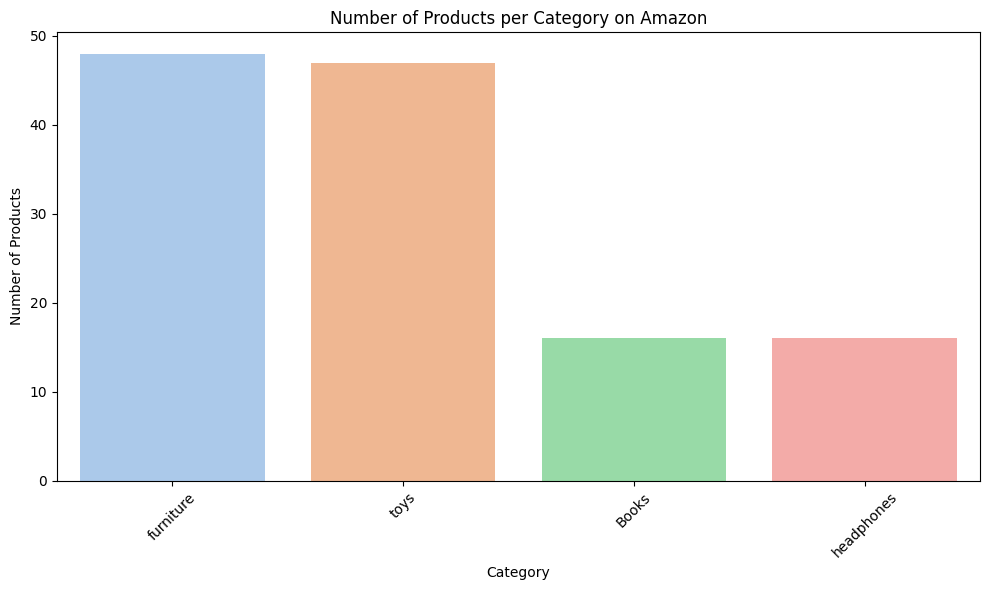

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by category and count
category_counts = df['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=category_counts, x='Category', y='Count', palette='pastel')

plt.title('Number of Products per Category on Amazon')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Assuming 'Price' is the column containing price data in your df DataFrame

# Replace commas, currency symbols and convert to float
df['Price_clean'] = df['Price'].str.replace('₹', '', regex=False).str.replace(',', '', regex=False).astype(float)

# Check the result
print(df.head())

# If you need to have a separate DataFrame called df, you can create it
# and assign the 'Price_clean' column:
df = df.copy()  # Or however you want to create df
df['prices'] = df['Price_clean']

                                               Title Price Category  \
2  Storio Rechargeable Toys Talking Cactus Baby T...  ₹338     toys   
3  Graphene Airplane Launcher Gun, Safe and Fun S...  ₹299     toys   
4  Gooyo DB2060 Rechargeable 360° Rotating & Roll...  ₹389     toys   
6  Graphene Bedtime Fun Kids Slide Projector Torc...  ₹199     toys   
7  VGRASSP Walkie Talkie Toys for Kids 2 Way Radi...  ₹399     toys   

   Price_clean  
2        338.0  
3        299.0  
4        389.0  
6        199.0  
7        399.0  


In [ ]:
# Replace commas, currency symbols and convert to float, handling errors
df['Price_clean'] = pd.to_numeric(df['Price'].str.replace('₹', '', regex=False).str.replace(',', '', regex=False), errors='coerce')

# Check the result
print(df.head())

# If you need to have a separate DataFrame called df, you can create it
# and assign the 'Price_clean' column:
df = df.copy()  # Or however you want to create df
df['prices'] = df['Price_clean']

# Now you can filter and find the maximum price for toys, ignoring NaN values
max_toys_price = df[df['search'] == "toys"]['prices'].max()
print(f"The maximum price for toys is: {max_toys_price}")

                                               Title            Price  \
0                                    Title not found  Price not found   
1                                    Title not found  Price not found   
2  DIY Chandrayan Painting Kit, Space Craft Educa...             ₹699   
3  PW Slime Kit for Girls and Boys Age 4,5,6,7,8,...             ₹489   
4  LEGO Speed Champions Ferrari F40 Supercar Vehi...           ₹2,999   

  Category search  Price_clean  
0     toys   toys          NaN  
1     toys   toys          NaN  
2     toys   toys        699.0  
3     toys   toys        489.0  
4     toys   toys       2999.0  
The maximum price for toys is: 2999.0


**⚠️ Challenges**

Amazon blocks bots aggressively (503 errors, CAPTCHA)

Dynamic content requires Selenium or headless browser control

Price and availability change frequently

**✅ Outcome**

Successfully scraped and visualized product data across selected categories. The data can now be used for downstream tasks like trend analysis, ML modeling.